# Graph Coloring with k colors 
- it is an assignment of labels traditionally called "colors" to elements of a graph subject to certain constraints
- (vertex coloring) it is a way of coloring the vertices of a graph such that no two adjacent vertices are of the same color

>given a set of points/vertices and a list of connections/edges between them, assign one of k colours to each vertex so that no two vertices connected by an edge share the same colour

>For this problem there is no natural ordering; that is, ‘red’ is no more like ‘yellow’ than
‘blue’, as long as they are different.

>Therefore, we could assign the colours to the k integers representing them in any order
and still get valid equivalent solutions.

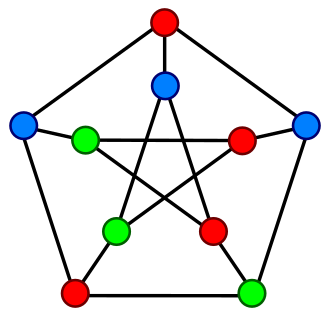

>Given an undirected graph G = (V, E), find a coloring of the vertices V such that no two adjacent vertices share the same color, and the number of colors used (k) is minimized.

1. Each vertex must be assigned a color.
2. No two adjacent vertices can have the same color. (Vertices connected by an edge are considered adjacent.)
3. The number of colors used should be minimized (k).

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
# we will need this for colors 
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm



# How to represent a graph 🤔?

>Adjacency Matrix: In this representation, a matrix is used where rows and columns represent vertices, and the presence of an edge between two vertices is indicated by a 1 or a weight if the graph is weighted, and 0 otherwise.
```python 
adj_matrix = [
    [0, 1, 1, 0],
    [1, 0, 1, 0],
    [1, 1, 0, 1],
    [0, 0, 1, 0]
]
```

>Adjacency List: In this representation, for each vertex in the graph, a list of adjacent vertices is maintained. 
```python 
adj_list = {
    0: [1, 2],
    1: [0, 2],
    2: [0, 1, 3],
    3: [2]
}
```

>Edge List: In this representation, all the edges of the graph are stored in a list or array. Each edge is represented as a tuple or an object containing the vertices it connects and optionally a weight.
```python 
[('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'E'), ('D', 'E'), ('D', 'F'), ('E', 'F'), ('E', 'G'), ('F', 'G'), ('F', 'H')]
```

- other representations of graph as a datastructure exist but we will focus on these representations and select one of them 

## Edge List 

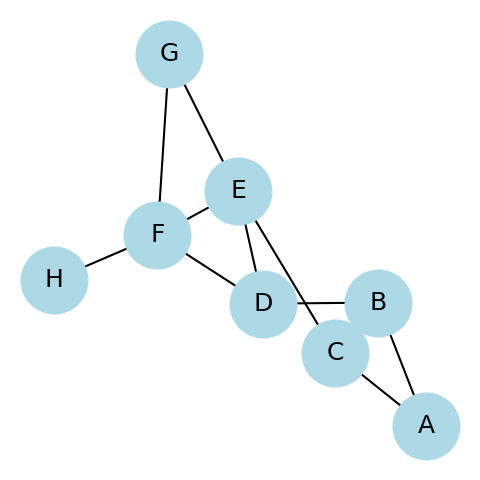

In [32]:
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'E'), ('D', 'E'), ('D', 'F'), ('E', 'F'), ('E', 'G'), ('F', 'G'), ('F', 'H')]

G2 = nx.from_edgelist(edges)
# Visualize the graph
plt.figure(figsize=(3, 3), dpi=150)
nx.draw(G2, with_labels=True, node_color='lightblue', node_size=1000)
plt.show()

## Adjacecy list 

Nodes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
Edges: [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'E'), ('D', 'E'), ('D', 'F'), ('E', 'F'), ('E', 'G'), ('F', 'G'), ('F', 'H'), ('G', 'H')]


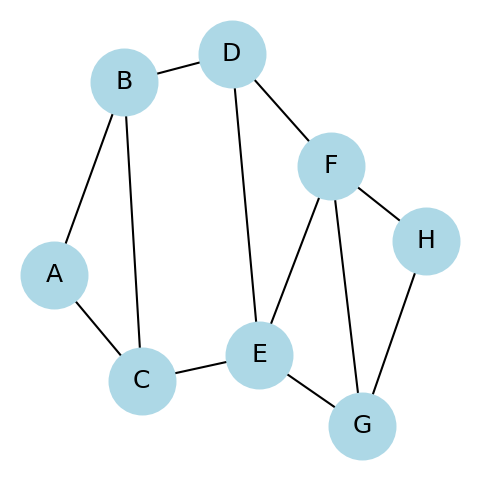

In [33]:
# Example adjacency list
adj_list = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'E'],
    'D': ['B', 'E', 'F'],
    'E': ['C', 'D', 'F', 'G'],
    'F': ['D', 'E', 'G', 'H'],
    'G': ['E', 'F', 'H'],
    'H': ['F', 'G']
}

# Create the graph
graph = nx.from_dict_of_lists(adj_list)
# Print the nodes and edges of the graph
print("Nodes:", graph.nodes())
print("Edges:", graph.edges())
# Visualize the graph
plt.figure(figsize=(3, 3), dpi=150)
nx.draw(graph, with_labels=True, node_color='lightblue', node_size=1000)
plt.show()


## How to color the graph  🎨?

In [34]:
# Example adjacency list
class Node:
    def __init__(self, name, color) -> None:
        self.name = name
        self.color = color
    # I did this so the graph don't show the address of the object in the memory 
    def __str__(self) -> str:
        return self.name

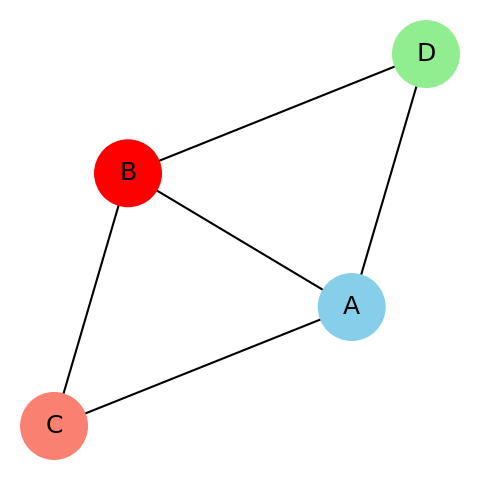

In [35]:
B = Node("B", "red")
A = Node("A", "skyblue")
C = Node("C", "Salmon")
D = Node("D", "lightgreen")
adj_list = {
    A : [B, C, D],
    B : [A, C, D],
    C : [B, A], 
    D : [A, B]

}

# Create the graph
graph = nx.from_dict_of_lists(adj_list)

# Set node colors as node attributes
for node in graph.nodes():
    graph.nodes[node]["color"] = node.color

# Draw the graph with node colors
plt.figure(figsize=(3, 3), dpi=150)
nx.draw(graph, with_labels=True, node_color=nx.get_node_attributes(graph, "color").values(), node_size=1000)
plt.show()


In [36]:
# this line would get us the attributes we set  (e.g. here the color)
nx.get_node_attributes(graph, "color").values()

dict_values(['skyblue', 'red', 'Salmon', 'lightgreen'])

In [37]:
for node in graph.nodes():
    print(graph.nodes[node]["color"])

skyblue
red
Salmon
lightgreen


# Designing the Evolutionary Algorithm 

### COLORS

In [38]:
# List all colors in XKCD Colors
xkcd_colors = mcolors.XKCD_COLORS
# let's see a sample of the 1000 colors in this list 
random.sample(sorted(xkcd_colors), 15)
# random.sample(sorted(xkcd_colors.values()), 15)

['xkcd:dark fuchsia',
 'xkcd:soft pink',
 'xkcd:navy',
 'xkcd:bright lilac',
 'xkcd:golden rod',
 'xkcd:beige',
 'xkcd:pale magenta',
 'xkcd:bright sea green',
 'xkcd:blue/green',
 'xkcd:hunter green',
 'xkcd:yellow ochre',
 'xkcd:baby poo',
 'xkcd:warm pink',
 'xkcd:dust',
 'xkcd:maize']

In [39]:
# to get the hexa
xkcd_colors["xkcd:dark magenta"]

'#960056'

## Initalize the population 

- looping over the graph nodes and assign each a random color sampled from the xkcd colors
- note that selecting from 1000 color will mostly meaning that most of the nodes will have initaliy distinct colors
- maybe we should use the same color more than once maybe... 
-  so we should reward the one having the less colors to minimize k 

In [40]:
random.sample(sorted(xkcd_colors), 1)[0]

'xkcd:slate blue'

In [41]:
# create some Nodes
# Node(name, colo)
nodes = [Node([chr(ord("A")+i) for i in range(8)][j], random.sample(sorted(xkcd_colors), 1)[0]) for j in range(8)]
A, B, C, D, E, F, G, H = nodes

In [42]:
for node in nodes:
    print(node.__getstate__())

{'name': 'A', 'color': 'xkcd:sunflower'}
{'name': 'B', 'color': 'xkcd:carmine'}
{'name': 'C', 'color': 'xkcd:vibrant green'}
{'name': 'D', 'color': 'xkcd:darkish purple'}
{'name': 'E', 'color': 'xkcd:plum purple'}
{'name': 'F', 'color': 'xkcd:weird green'}
{'name': 'G', 'color': 'xkcd:deep rose'}
{'name': 'H', 'color': 'xkcd:dark indigo'}


In [43]:
adj_list = {
    A: [B, C],
    B: [A, C, D],
    C: [A, B, E],
    D: [B, E, F],
    E: [C, D, F, G],
    F: [D, E, G, H],
    G: [E, F, H],
    H: [F, G]
}

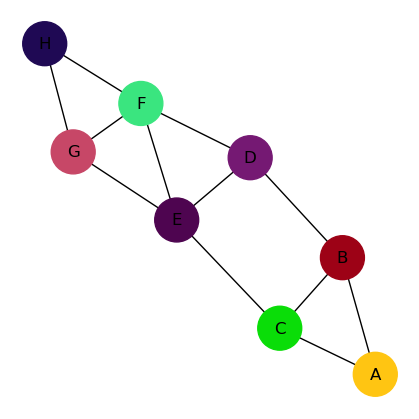

In [44]:
def plot_Graph(adj_list, turnoffplot=False):
    # Create the graph
    graph = nx.from_dict_of_lists(adj_list)

    # Set node colors as node attributes
    for node in graph.nodes():
        graph.nodes[node]["color"] = node.color
        
        
    fig = None
    # if the plotting is not turned off 
    # we may turn it off when we need the graph object
    # like when used with subplots
    if not turnoffplot:
        # Draw the graph with node colors
        fig = plt.figure(figsize=(4, 4))
        nx.draw(graph, with_labels=True, node_color=nx.get_node_attributes(graph, "color").values(), node_size=1000)
    # plt.show()
    return graph, fig

graphX, fig = plot_Graph(adj_list)


> we may use this inital set of colors as a pool of color selection instead of all the 1000 color in the worst case k can be equal to the number of vertices as every vertex would have a unique color 

### Out Genes for the problem 🧬🧬

In [45]:
colors = list(nx.get_node_attributes(graphX, "color").values())
colors_genes = {i : colors[i] for i in range(len(colors))}
colors_genes

{0: 'xkcd:sunflower',
 1: 'xkcd:carmine',
 2: 'xkcd:vibrant green',
 3: 'xkcd:darkish purple',
 4: 'xkcd:plum purple',
 5: 'xkcd:weird green',
 6: 'xkcd:deep rose',
 7: 'xkcd:dark indigo'}

In [46]:
# create some Nodes
# Node(name, colo)
def create_nodes(numOfNodes=8, colors=None):
    nodes = [Node( [chr(ord("A")+i) for i in range(numOfNodes)][j], random.sample(sorted(xkcd_colors), 1)[0]) for j in range(numOfNodes) ]
    if colors is None:
        return nodes
    else:
         for i, node in enumerate(nodes):
             node.color = colors_genes[colors[i]]  
    return nodes


A, B, C, D, E, F, G, H = nodes = create_nodes(colors=[7, 3, 1, 7, 1, 0, 0, 1])


In [47]:
for node in nodes:
    print(f"{node.name} , {node.color}")

A , xkcd:dark indigo
B , xkcd:darkish purple
C , xkcd:carmine
D , xkcd:dark indigo
E , xkcd:carmine
F , xkcd:sunflower
G , xkcd:sunflower
H , xkcd:carmine


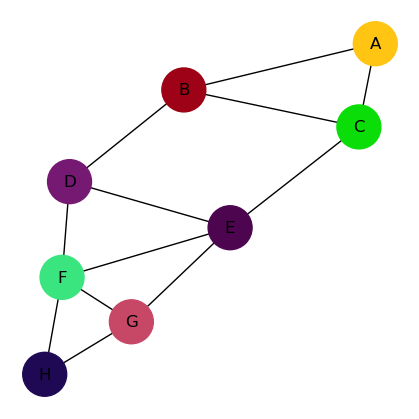

In [48]:
plot_Graph(adj_list);

In [49]:
def initalize_population(pop_size):
    return [[random.sample(sorted(colors_genes), 1)[0] for _ in range(len(colors_genes))] for i in range(pop_size)]

In [50]:
init_pop = initalize_population(10)
init_pop

[[2, 5, 1, 5, 2, 4, 4, 5],
 [1, 6, 1, 5, 0, 6, 1, 6],
 [5, 7, 5, 7, 4, 5, 1, 2],
 [1, 7, 4, 1, 4, 2, 1, 1],
 [1, 4, 3, 1, 3, 2, 6, 6],
 [7, 1, 0, 1, 1, 0, 6, 1],
 [2, 6, 3, 3, 5, 2, 3, 7],
 [7, 3, 2, 4, 7, 2, 7, 6],
 [4, 3, 0, 6, 1, 5, 4, 7],
 [3, 4, 5, 3, 5, 5, 6, 6]]

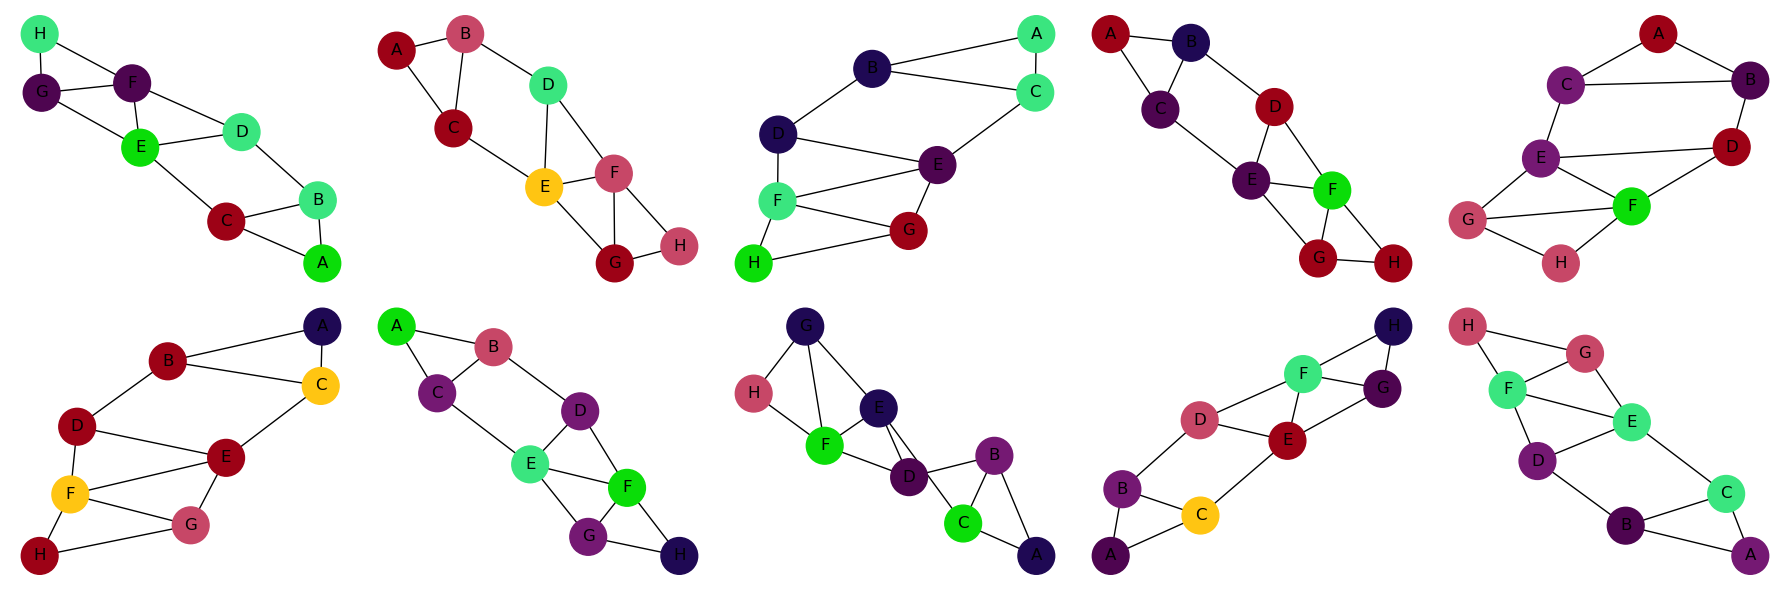

In [51]:
# Create a new figure for subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 6))
# Flatten the axes array
axes_flat = axes.flatten()

for i, p in enumerate(init_pop):
    A, B, C, D, E, F, G, H = create_nodes(colors=p)
    adj_list = {
    A: [B, C],
    B: [A, C, D],
    C: [A, B, E],
    D: [B, E, F],
    E: [C, D, F, G],
    F: [D, E, G, H],
    G: [E, F, H],
    H: [F, G]
    }



    graph = plot_Graph(adj_list, turnoffplot=True)[0] #graph
    nx.draw(graph, with_labels=True, node_color=nx.get_node_attributes(graph, "color").values(), node_size=700, ax=axes_flat[i])

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()


In [52]:
init_pop

[[2, 5, 1, 5, 2, 4, 4, 5],
 [1, 6, 1, 5, 0, 6, 1, 6],
 [5, 7, 5, 7, 4, 5, 1, 2],
 [1, 7, 4, 1, 4, 2, 1, 1],
 [1, 4, 3, 1, 3, 2, 6, 6],
 [7, 1, 0, 1, 1, 0, 6, 1],
 [2, 6, 3, 3, 5, 2, 3, 7],
 [7, 3, 2, 4, 7, 2, 7, 6],
 [4, 3, 0, 6, 1, 5, 4, 7],
 [3, 4, 5, 3, 5, 5, 6, 6]]

In [53]:
list(colors_genes.values())

['xkcd:sunflower',
 'xkcd:carmine',
 'xkcd:vibrant green',
 'xkcd:darkish purple',
 'xkcd:plum purple',
 'xkcd:weird green',
 'xkcd:deep rose',
 'xkcd:dark indigo']

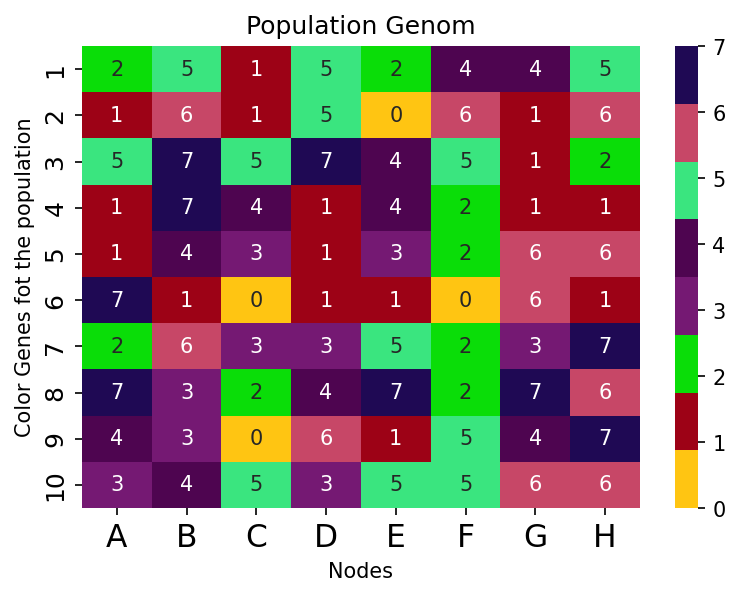

In [54]:
# Creating a custom colormap for the heatmap
# Define a colormap and normalization instance
cmap = ListedColormap(list(colors_genes.values()))
# This array defines the boundaries for the colormap normalization
# Each number represents the boundary between consecutive colors in the colormap
# bounds = np.arange(0, len(colors_genes))  
# norm = BoundaryNorm(bounds, cmap.N)

# Plot heatmap with custom colors
plt.figure(figsize=(6, 4), dpi=150)
sns.heatmap(init_pop, cmap=cmap, annot=True)
plt.xlabel("Nodes")
plt.ylabel("Color Genes fot the population")
# (location, labels)
plt.xticks(np.arange(0.5, 8.5), [chr(ord("A") + i) for i in range(8)], size=15)
plt.yticks(np.arange(0.5, len(init_pop) + 0.5), np.arange(1, len(init_pop) + 1), size=12)
plt.title("Population Genom")

plt.show()


In [55]:
init_pop

[[2, 5, 1, 5, 2, 4, 4, 5],
 [1, 6, 1, 5, 0, 6, 1, 6],
 [5, 7, 5, 7, 4, 5, 1, 2],
 [1, 7, 4, 1, 4, 2, 1, 1],
 [1, 4, 3, 1, 3, 2, 6, 6],
 [7, 1, 0, 1, 1, 0, 6, 1],
 [2, 6, 3, 3, 5, 2, 3, 7],
 [7, 3, 2, 4, 7, 2, 7, 6],
 [4, 3, 0, 6, 1, 5, 4, 7],
 [3, 4, 5, 3, 5, 5, 6, 6]]

In [65]:
[[-1 for _ in range(len(graph))] for _ in range(len(graph))]


[[-1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1],
 [-1, -1, -1, -1, -1, -1, -1, -1]]

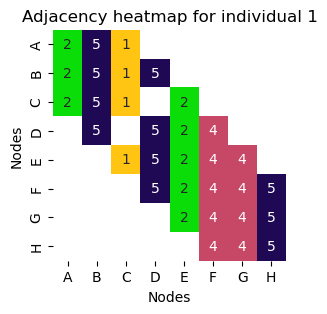

In [122]:
def adjacency_heatmap(individual):
    seeadjc = [[-1 for _ in range(len(graph))] for _ in range(len(graph))]
    for node_idx, (node, adjacent_nodes) in enumerate(adj_list.items()):
        # print(node.name," : ", end=" " )
        seeadjc[node_idx][node_idx] = individual[node_idx]
        for adj_node in adjacent_nodes:
            # getting the index of the current adj_node from the keys of the adj_list
            # A, B, C, ...-> , 0, 1, 2, ...->
            adj_node_index = list(adj_list).index(adj_node)
            # for the node (node_idx) and each adjacent index 
            seeadjc[node_idx][adj_node_index] = individual[adj_node_index]
            # print(adj_node.name, end=" ")
        # print("")

    # nx.draw(graph, annot=True)
    return seeadjc


# Plot heatmap with custom colors
plt.figure(figsize=(3, 3))
sns.heatmap(adjacency_heatmap(init_pop[0]), cmap=cmap, annot=True, cbar=False, mask=np.array(adjacency_heatmap(init_pop[0])) == -1)
plt.xlabel("Nodes")
plt.ylabel("Nodes")
# (location, labels)
plt.xticks(np.arange(0.5, 8.5), [chr(ord("A") + i) for i in range(8)], size=10)
plt.yticks(np.arange(0.5, 8.5), [chr(ord("A") + i) for i in range(8)], size=10)

plt.title("Adjacency heatmap for individual 1")

plt.show()
# adj_list = {
#     A: [B, C],
#     B: [A, C, D],
#     C: [A, B, E],
#     D: [B, E, F],
#     E: [C, D, F, G],
#     F: [D, E, G, H],
#     G: [E, F, H],
#     H: [F, G]
# }

> Using this <span style="color:salmon">Adjacency Heatmap</span> can help us visualy detect where the individual fails our conditions for no two adjacent cells in the same row should ever have the same color we can see that condition fails in some graphs 

> we compare the diagonal color with the colors next to it on the same row
 - if any of the cells on the same row have the same color as the diagonal color it fails in the condition 


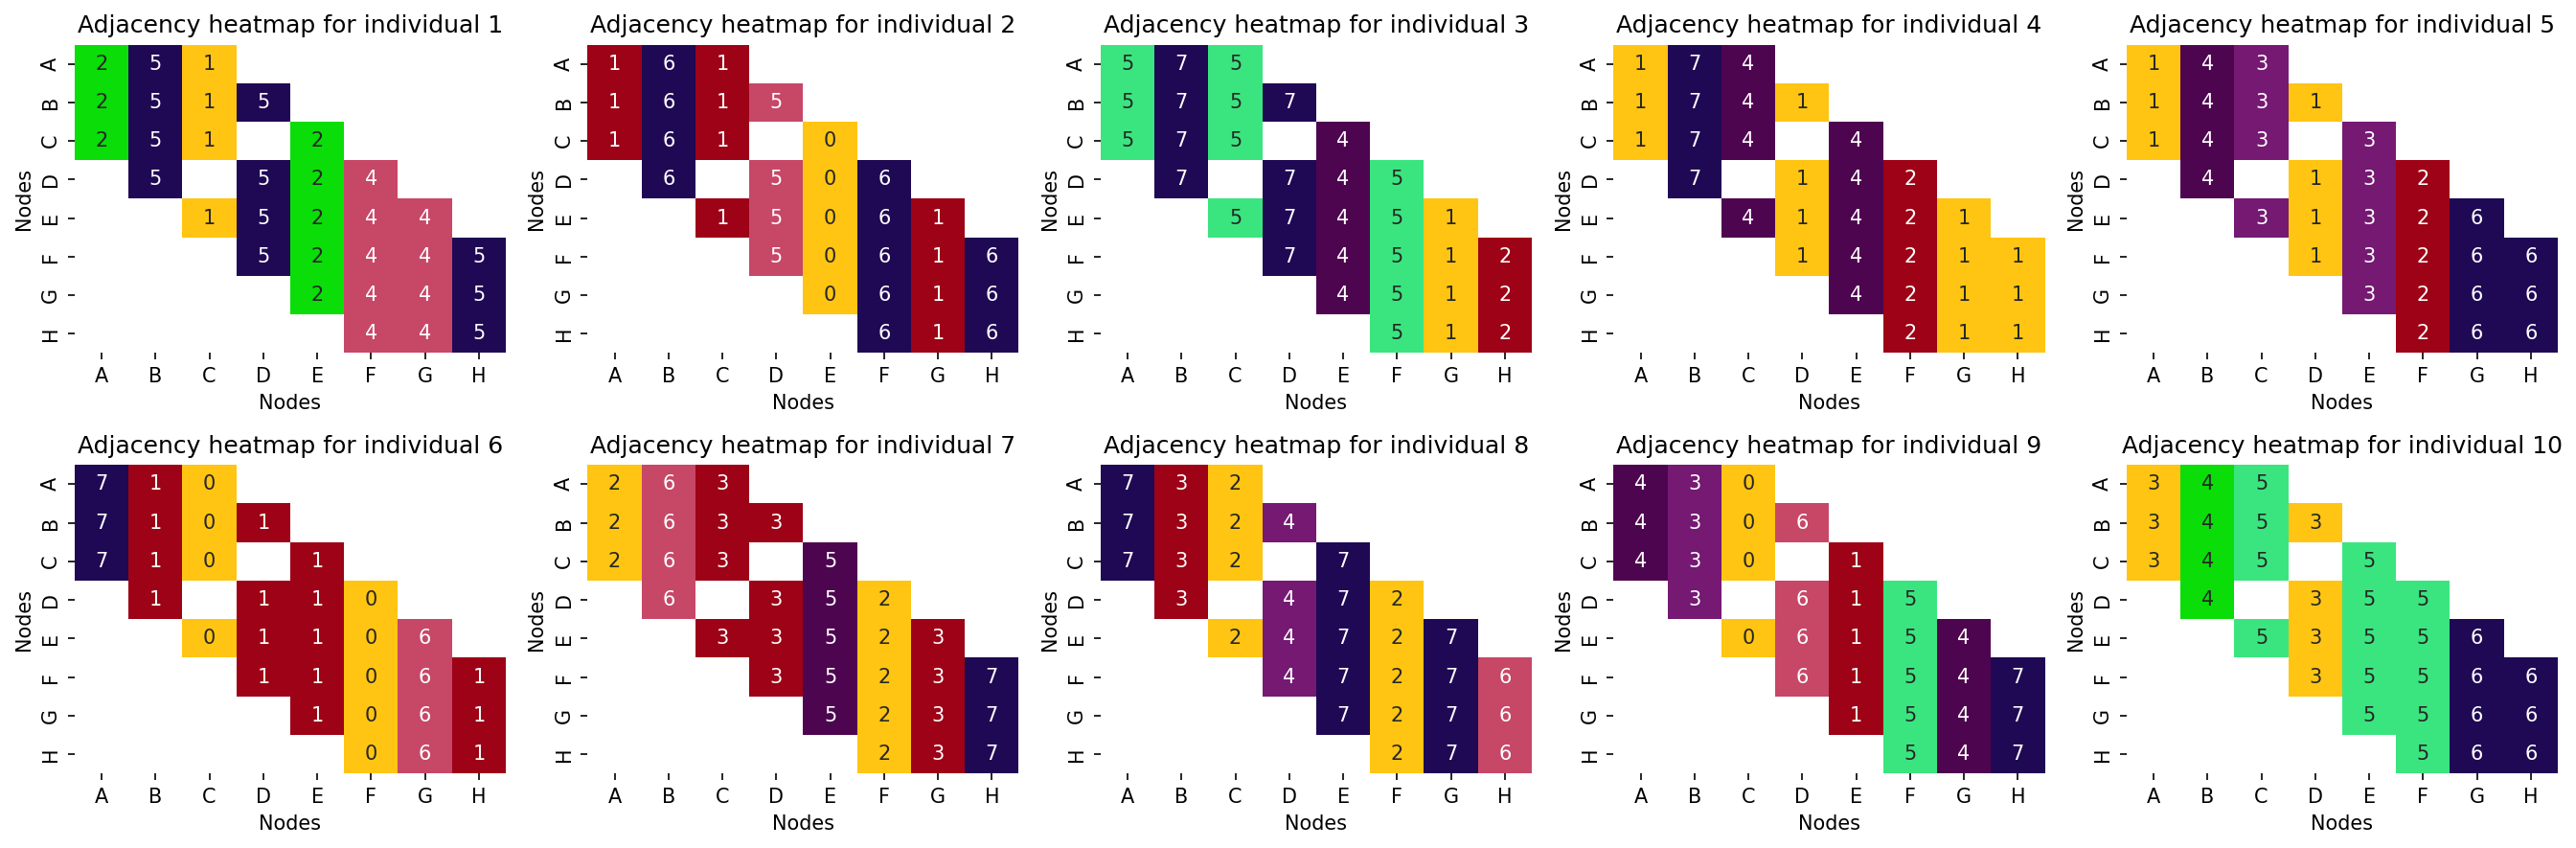

In [124]:
def draw_pop_adjacency_heatmap(pop):
    # Create a new figure for subplots
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 6), dpi=150)
    # Flatten the axes array
    axes_flat = axes.flatten()

    for i in range(len(axes_flat)):
        # Plot heatmap with custom colors
        sns.heatmap(adjacency_heatmap(pop[i]), cmap=cmap, annot=True, cbar=False, mask=np.array(adjacency_heatmap(pop[i])) == -1, ax=axes_flat[i])
        axes_flat[i].set_xlabel("Nodes")
        axes_flat[i].set_ylabel("Nodes")
        # (location, labels)
        axes_flat[i].set_xticks(np.arange(0.5, 8.5), [chr(ord("A") + i) for i in range(8)], size=10)
        axes_flat[i].set_yticks(np.arange(0.5, 8.5), [chr(ord("A") + i) for i in range(8)], size=10)

        axes_flat[i].set_title(f"Adjacency heatmap for individual {i+1}")

    # Adjust layout
    plt.tight_layout()


    plt.show()  
draw_pop_adjacency_heatmap(init_pop)

# Fitness function 

In [142]:
def fitness(individual, adj_list=adj_list):
    score = 0
    colors_used = []
    for node_idx, (node, adjacent_nodes) in enumerate(adj_list.items()):
        node_color = individual[node_idx]
        colors_used.append(node_color)
        for adj_node in adjacent_nodes:
            # punish confilcts 
            if node_color == individual[list(adj_list).index(adj_node)]:
                score -= 10
            else:
                score += 1
            # reward the repeated used of colors to encourage using less colors 
            # minimize k
            if node_color in colors_used:
                # score += colors_used.count(node_color)
                # how about normalizing it  by dividing on the worst k?
                 score += colors_used.count(node_color) /len(adj_list)
            

    return score

In [143]:
# let's test it 
for i, p in enumerate(init_pop):
    print(f"individual {i+1} Fitness: {fitness(p)}")

individual 1 Fitness: -15.25
individual 2 Fitness: -14.875
individual 3 Fitness: -15.25
individual 4 Fitness: -14.625
individual 5 Fitness: -15.875
individual 6 Fitness: -14.375
individual 7 Fitness: 28.625
individual 8 Fitness: 6.75
individual 9 Fitness: 27.375
individual 10 Fitness: -36.875


# CrossOver 

## One Point Crossover 

- Choose a random point on the two parents `(1, n-1)`
- switch tails after this point

>A single-point (and relatively the two-point) crossover is more likely to keep genes
near each other together, but genes from opposite ends of the string can never be
kept together.

>Positional Bias; i.e., the probability of inheriting a specific gene
from a parent is influenced by its position within the chromosome .

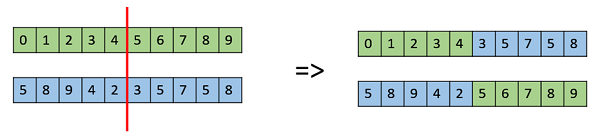

In [144]:
def onePointCrossOver(parent1, parent2):
    point = random.randint(1, len(parent1)-1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

## N-points Crossover


In [179]:
def nPointsCrossOVer(parent1, parent2, npoints):
    # Ensure that the number of points is within the range of the chromosome length
    npoints = min(npoints, len(parent1) - 1)
    
    # sample n points
    n_points = random.sample(range(1, len(parent1)-1), npoints)
    # sort them
    n_points = sorted(n_points)

    child1 = parent1[:]
    child2 = parent2[:]
    
    for p in range(0, len(n_points), 2):
        # the first point in our list of sorted points
        point1 = n_points[p]
        # because we are stepping 2 steps each iteration we need to check if we exceeding the boundries
        if p+1 < len(n_points):
            # taking the second point after the first we selected 
            point2 = n_points[p+1]
        else:
            # if the next point exceed the limit when adding 1 
            # it's just mean it's the last point 
            # or the number of points is odd so we just make the last point is the end of the parent
            point2 = len(n_points)

        # swapping the segments 
        # a, b = b, a (swapping)
        # we are swapping between the points 
        child1[point1: point2], child2[point1: point2] = parent2[point1:point2], parent1[point1:point2]

    return child1, child2, n_points

In [180]:
p1, p2 = [1,2,3,4], [5, 6, 7, 8]
c1, c2, points = nPointsCrossOVer(p1, p2, npoints=2)
print(c1)
print(c2)
print(points)


[1, 6, 3, 4]
[5, 2, 7, 8]
[1, 2]


### How the n-points crossover should work?

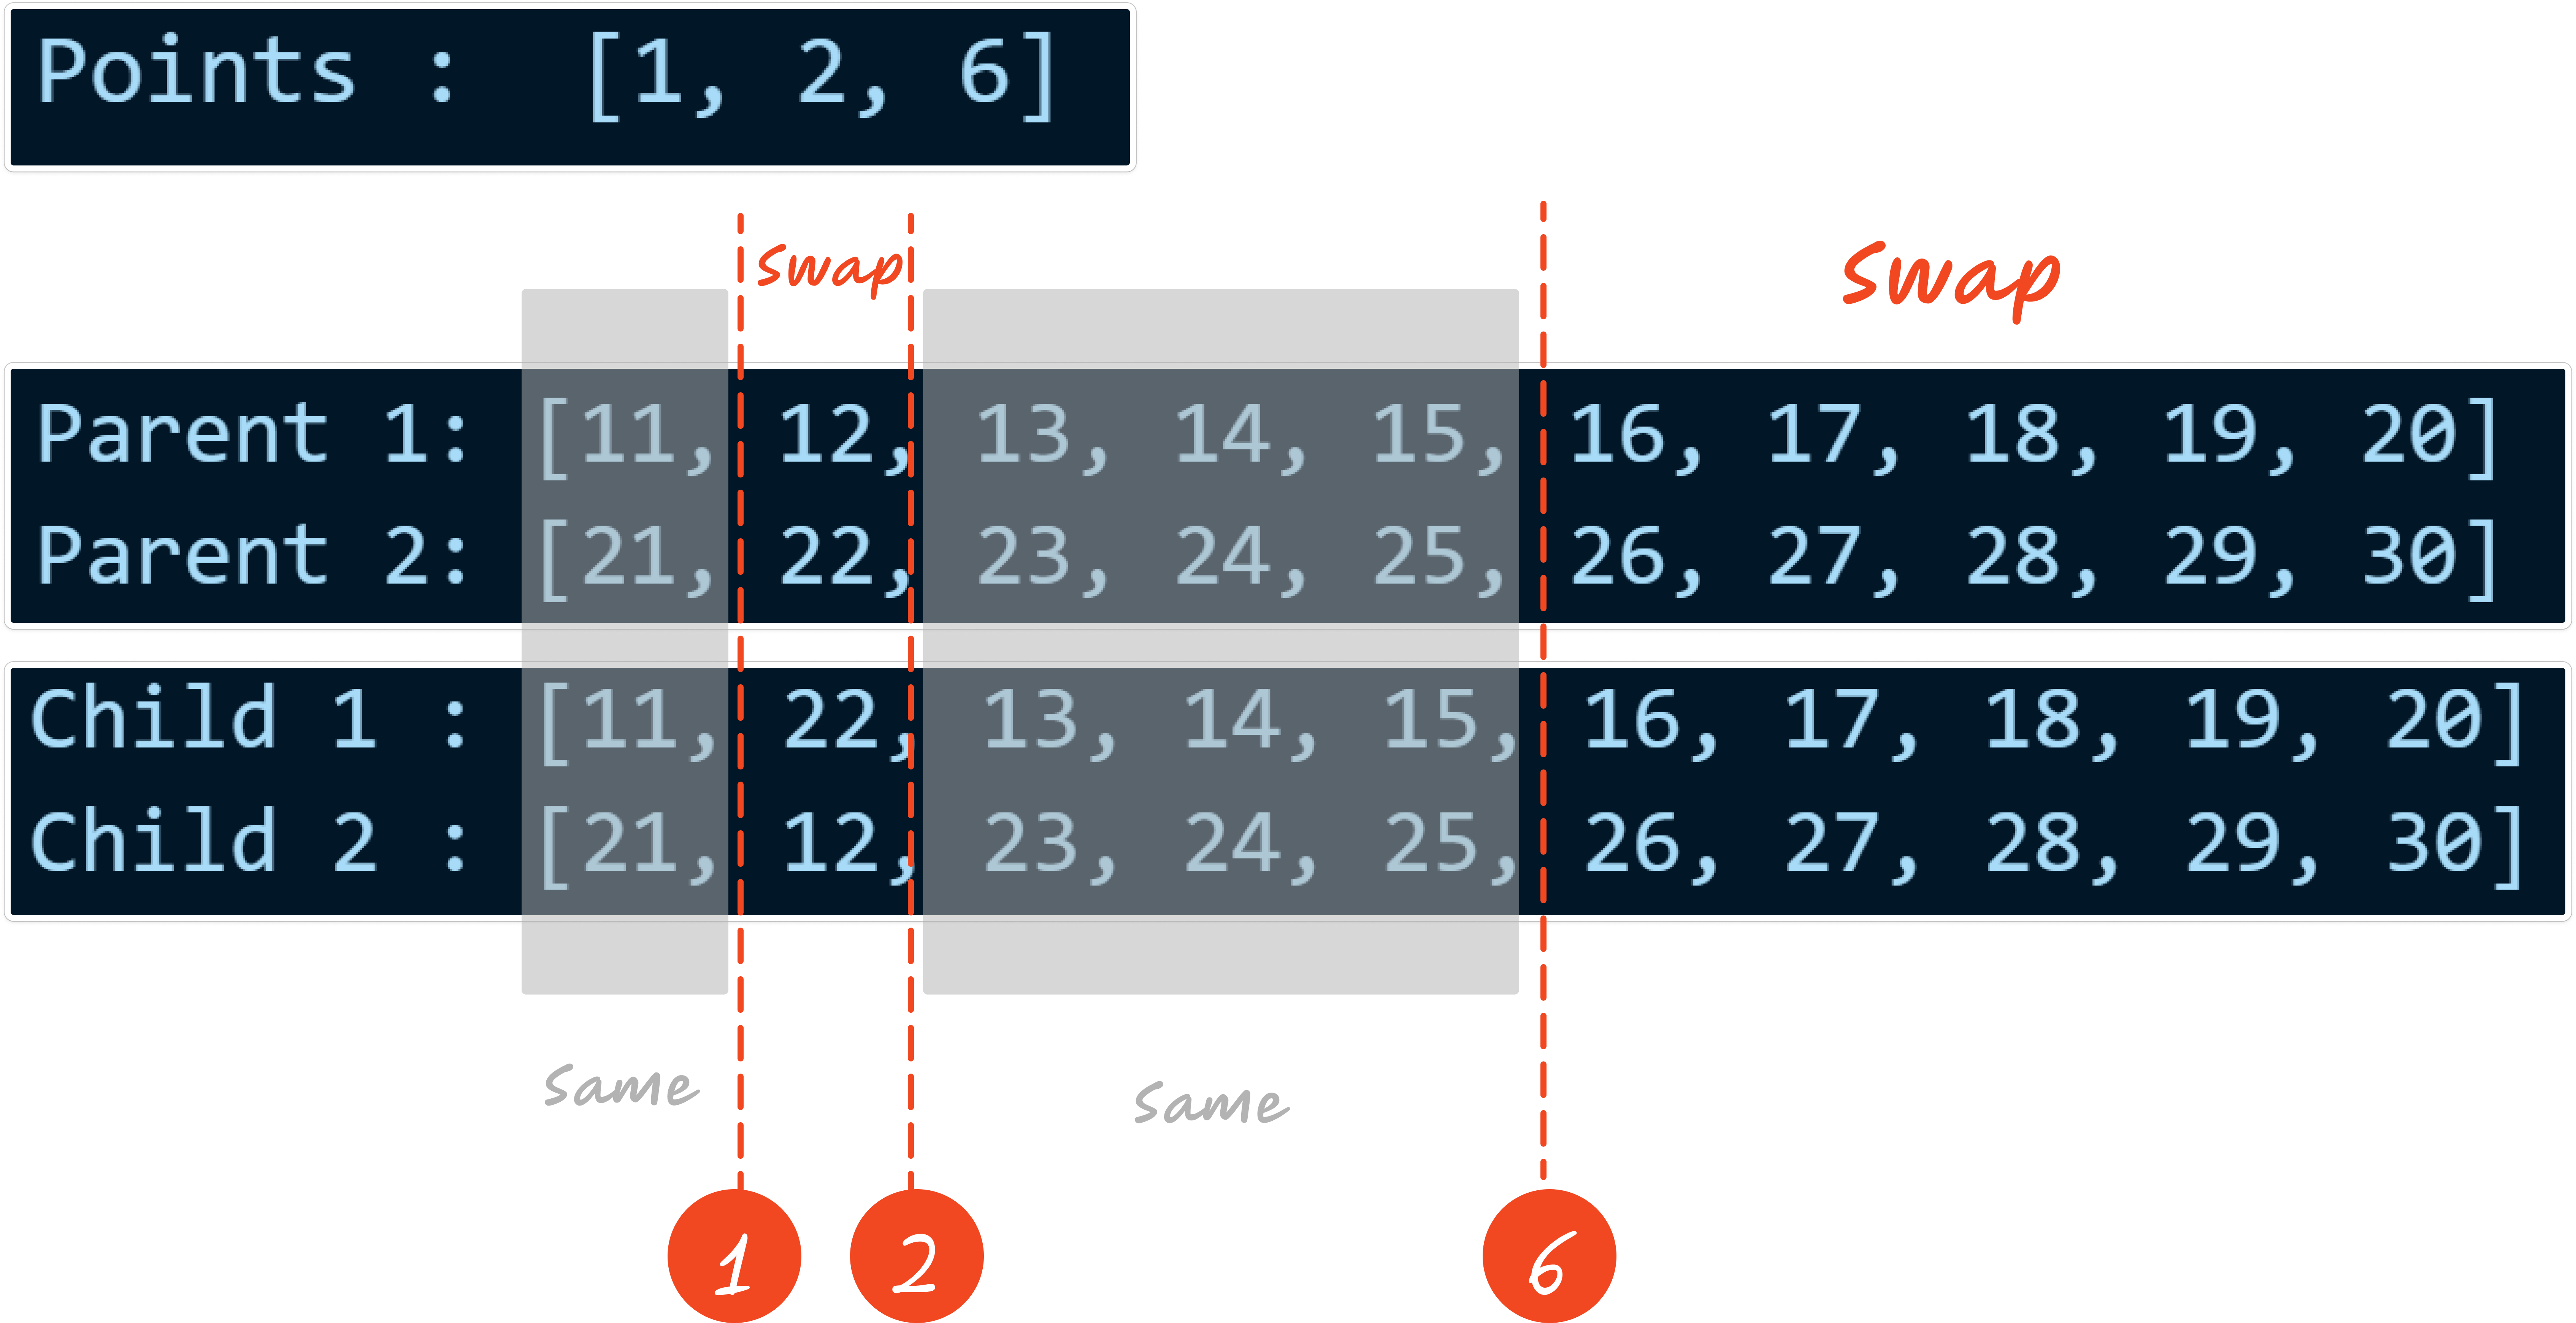

### Testing the n_points crossover

In [186]:
# Sample parent individuals
parent1 = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
parent2 = [21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

# Number of crossover points
npoints = 3

# Perform crossover
child1, child2, points = nPointsCrossOVer(parent1, parent2, npoints)

# Print the results
print("Parent 1:", parent1)
print("Parent 2:", parent2)
print("Child 1 :", child1)
print("Child 2 :", child2)
print("Points : ", points)

Parent 1: [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Parent 2: [21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Child 1 : [11, 22, 13, 14, 15, 16, 17, 18, 19, 20]
Child 2 : [21, 12, 23, 24, 25, 26, 27, 28, 29, 30]
Points :  [1, 2, 6]


# Mutation 

-  Random Resetting 
    - Extends the bit-flipping mutation of binary encodings
    - With probability $p_m$, a new value is chosen randomly (from a set of permissible values).
    - Most suitable for cardinal attributes (i.e., categorical variables)
    - just like randomly selecting a color in the chromosomes (colors of the graph noes)


In [188]:
list(colors_genes)

[0, 1, 2, 3, 4, 5, 6, 7]

In [229]:
def mutate(indivdual, mutation_rate=0.1):
    indivdual = [random.sample(list(colors_genes), 1)[0] if random.random()< mutation_rate else e for e in indivdual]
    return indivdual

mutate([2, 5, 1, 5, 2, 4, 4, 5])


[2, 5, 1, 5, 2, 4, 4, 5]

# Parent Selection 